# **Lab 1**: ELE888
#### Janeeta Zahid 
#### 500828574

In [24]:
#Imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#import dataset 
student_marks=pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')

### **Data Preperation and EDA** 

###### Mean of Grades

In [4]:
midterm_mean=student_marks['Midterm mark'].mean()
final_mean=round(student_marks['Final mark'].mean(),3)
print('Mean of Midterm Grades:', midterm_mean)
print('Mean of Final Grades:', final_mean)

Mean of Midterm Grades: 48.959
Mean of Final Grades: 72.735


###### Standard Diviation of Grades

In [5]:
midterm_std=round(student_marks['Midterm mark'].std(),3)
final_std=round(student_marks['Final mark'].std(),3)
print('Standard deviation of Midterm Grades:', midterm_std)
print('Standard deviation of Final Grades:', final_std)

Standard deviation of Midterm Grades: 9.746
Standard deviation of Final Grades: 16.658


In [6]:
def Standardize(arr):
    avg=np.average(arr)
    std=np.std(arr)
    for i in range(len(arr)):
      arr[i]=(arr[i]-avg)/std
    return arr

mid_standardized=Standardize(student_marks['Midterm mark'].to_numpy())
final_standardized=Standardize(student_marks['Final mark'].to_numpy())



Visualizing Data and Initial Regression Line

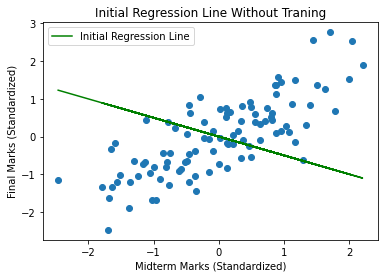

In [7]:
plt.scatter(mid_standardized,final_standardized)
y=mid_standardized*(-0.5)+0
plt.plot(mid_standardized,y,label='Initial Regression Line',color='green')
plt.xlabel("Midterm Marks (Standardized)")
plt.ylabel("Final Marks (Standardized)")
plt.title('Initial Regression Line Without Traning')
plt.legend()
plt.show()

### **Functions**

In [8]:
def Gradient(arr1,arr2,p,m,b):
    d=0
    for i in range(len(arr1)):
        count=-1*(arr2[i]-(m*arr1[i]+b))
        if p=='m':
            count*=arr1[i]
        d+=count
    return 2*d/len(arr1)

In [9]:
def error(arr1,arr2,m,b):
    error=0 
    for i in range(len(arr1)):
        error+=(arr2[i]-(m*arr1[i]+b))**2
    error=error/(len(arr1))
    return error

In [10]:
def update(arr1,arr2,m,b,p,a):
    if(p=='m'):
        return m-a*Gradient(arr1,arr2,'m',m,b)
    if(p=='b'):
        return b-a*Gradient(arr1,arr2,'b',m,b)

In [11]:
def plotError(err,title):
    plt.plot(range(len(err)),err)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    plt.title(title)
    plt.show()


In [12]:
def plot(arr1,arr2,m,b,title):
    plt.scatter(arr1,arr2)
    y=arr1*(m)+b
    plt.plot(arr1,y,label='Linear Regression Model',color='green')
    plt.xlabel("Midterm Marks")
    plt.ylabel("Final Marks")
    plt.title(title)
    plt.legend()
    plt.show()
    

In [39]:
def Model(arr1,arr2,m,b,a,itr,title1):
    err=[]
    for i in range(0,itr):
       m_o=m
       b_o=b
       m=update(arr1,arr2,m_o,b_o,'m',a)
       b=update(arr1,arr2,m_o,b_o,'b',a)
       err.append(error(arr1,arr2,m,b))
    title='Error function after '+str(itr)+' Iterations'
    plot(arr1,arr2,m,b,title1)
    plotError(err,title)
    print("Final m=  ",m)
    print("Final b= ",b)

### **Traning Model on Standardized Data**

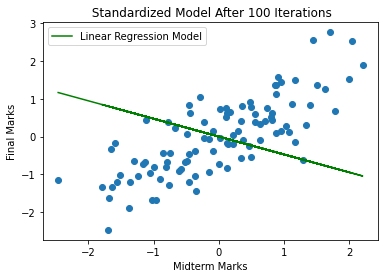

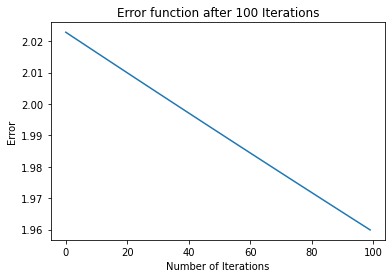

Final m=   -0.4747809463889036
Final b=  -2.313704783318825e-18


In [40]:

Model(mid_standardized,final_standardized,-0.5,0,0.0001,100,' Standardized Model After 100 Iterations')

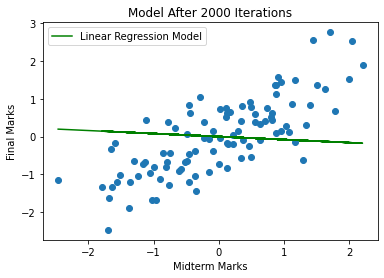

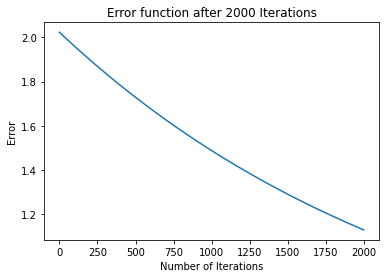

Final m=   -0.08012563486637699
Final b=  -1.8396839607248724e-17


In [41]:
Model(mid_standardized,final_standardized,-0.5,0,0.0001,2000,'Model After 2000 Iterations')

### **Traning Model on Unstandardized Data**

In [42]:
student_marks_unstand=pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')

In [43]:
mid=student_marks_unstand['Midterm mark'].to_numpy()
final=student_marks_unstand['Final mark'].to_numpy()

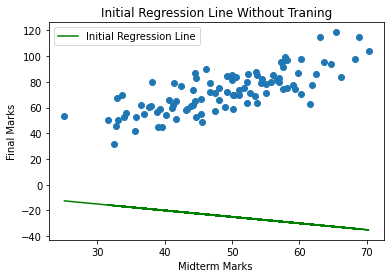

In [44]:
plt.scatter(mid,final)
y=mid*(-0.5)+0
plt.plot(mid,y,label='Initial Regression Line',color='green')
plt.xlabel("Midterm Marks ")
plt.ylabel("Final Marks")
plt.title('Initial Regression Line Without Traning')
plt.legend()
plt.show()

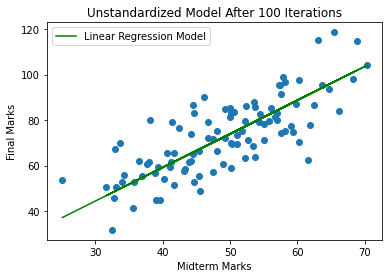

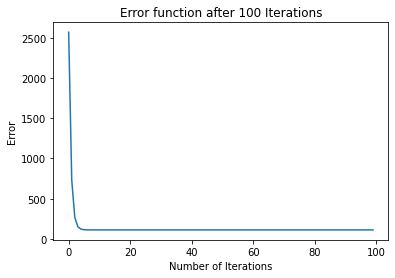

Final m=   1.4785727560143909
Final b=  0.04490536397288713


In [45]:
Model(mid,final,-0.5,0,0.0001,100,'Unstandardized Model After 100 Iterations')

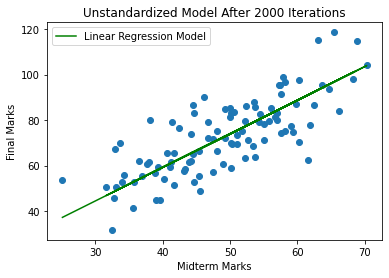

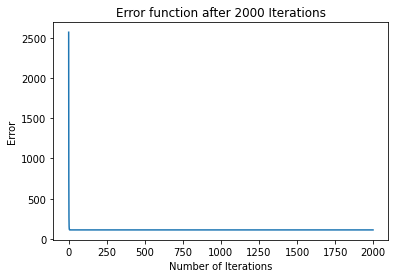

Final m=   1.4763433036607632
Final b=  0.15833790708442705


In [46]:
Model(mid,final,-0.5,0,0.0001,2000,'Unstandardized Model After 2000 Iterations')

#### Changing the Leaning Rate 

##### Standardized Data

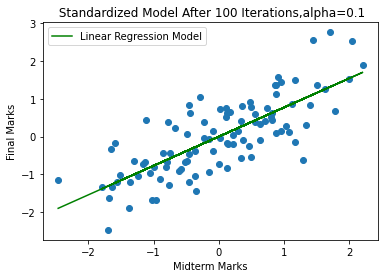

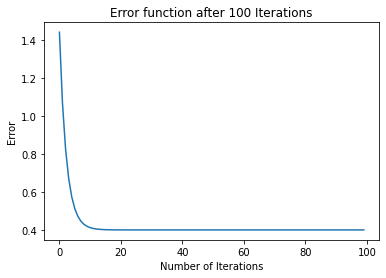

Final m=   0.7734781433087615
Final b=  2.6501023597802487e-16


In [47]:
Model(mid_standardized,final_standardized,-0.5,0,0.1,100,' Standardized Model After 100 Iterations,alpha=0.1')

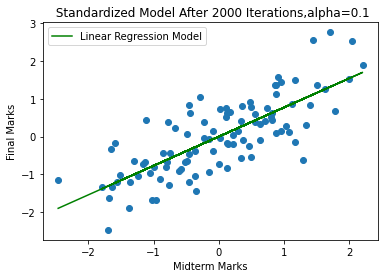

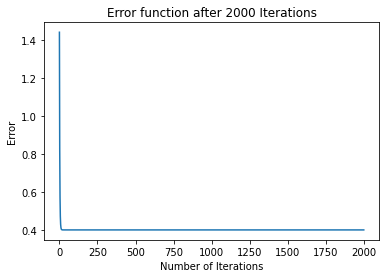

Final m=   0.7734781435681735
Final b=  1.904032487232142e-16


In [48]:
Model(mid_standardized,final_standardized,-0.5,0,0.1,2000,' Standardized Model After 2000 Iterations,alpha=0.1')

##### Verifying Using Sklearn

In [49]:
reg=LinearRegression()
reg.fit(mid_standardized.reshape(-1, 1),final_standardized)
print(reg.coef_)
print(reg.intercept_)

[0.77347814]
2.5515431945611573e-16


We can see that the values generated are very close to the values obtained by created model 